# Utility functions

pRT contains some useful utility functions such as a spectral library, pre-implemented pressure-temperature profiles, etc. The use of some of them is shown below. pRT also comes with a package of physical constants, most of which are defined by importing [astropy](https://www.astropy.org/) and [scipy](https://scipy.org/) constants, however.

## Constants
Can be accessed by importing `from petitRADTRANS import physical_constants as cst`. All units are in cgs.

   * `cst.c`: speed of light
   * `cst.h`: Planck constant
   * `cst.kB`: Boltzman constant
   * `cst.nA`: Avogadro constant
   * `cst.e`: electron charge
   * `cst.G`: Gravitational constant
   * `cst.m_elec`: electron mass
   * `cst.sigma`: Stefan-Boltzman constant
   * `cst.L0`: Loschmidt constant
   * `cst.R`: universal gas constant
   * `cst.bar`: 1 bar in cgs
   * `cst.atm`: 1 atmosphere in cgs
   * `cst.au`: Astronomical unit
   * `cst.pc`: parsec
   * `cst.light_year`: light year
   * `cst.amu`: atomic mass unit in g
   * `cst.r_sun`: solar radius
   * `cst.r_jup`: Jupiter equatorial radius
   * `cst.r_jup_mean`: Jupiter mean radius
   * `cst.r_earth`: Earth radius
   * `cst.m_sun`: Solar mass
   * `cst.m_jup`: Jupiter mass
   * `cst.m_earth`: Earth mass
   * `cst.s_earth`: solar_irradiance

## Planck function

The planck function $B_\nu(T)$, in units of erg/cm$^2$/s/Hz/steradian, for a given frequency array, can be generated like this:

In [1]:
from petitRADTRANS import physical_constants as cst
from petitRADTRANS import physics as phys
import numpy as np

# Define wavelength array, in cm
lamb = np.logspace(-5,-2,100)
# Convert to frequencies
freq = cst.c / lamb
# Calculate Planck function at 5750 K
planck = phys.planck_function_hz(5750., freq)

Let's plot the Planck function:

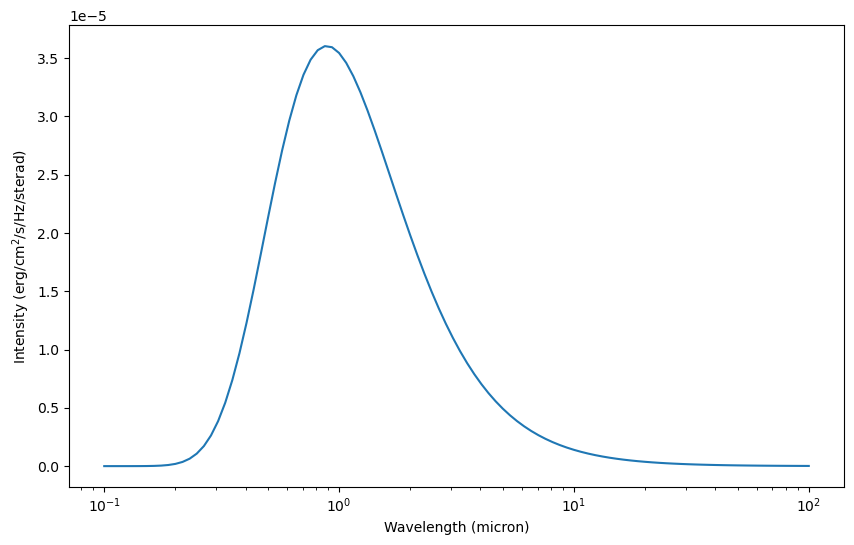

<Figure size 1000x600 with 0 Axes>

In [2]:
# Plot Planck function
import pylab as plt
plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(lamb/1e-4, planck)
plt.xscale('log')
plt.xlabel('Wavelength (micron)')
plt.ylabel('Intensity (erg/cm$^2$/s/Hz/sterad)')
plt.show()
plt.clf()

## PHOENIX and ATLAS9 stellar model spectra

Within petitRADTRANS the PHOENIX and ATLAS9 stellar spectra can be used, as described in Appendix A of [van Boekel et al. (2012)](http://adsabs.harvard.edu/abs/2012SPIE.8442E..1FV). The PHOENIX model refrence, for stellar effective temperatures < 10,000 K is [Husser et al. (2013)](http://adsabs.harvard.edu/abs/2013A%26A...553A...6H). The ATLAS9 model references for effective temperatures > 10,000 K are Kurucz [(1979](http://adsabs.harvard.edu/abs/1979ApJS...40....1K), [1992](http://adsabs.harvard.edu/abs/1992IAUS..149..225K), [1994)](http://adsabs.harvard.edu/abs/1994KurCD..19.....K).

The models can be acessed like this, this is for a 5750 K effective temperature star on the main sequence:

In [3]:
from petitRADTRANS.stellar_spectra.phoenix import PhoenixStarTable

star = PhoenixStarTable()
stellar_spec, __ = star.compute_spectrum(5750)
wlen_in_cm = stellar_spec[:,0]
flux_star = stellar_spec[:,1]

Loading PHOENIX star table in file '/Users/molliere/Desktop/input_data_v3/input_data/stellar_spectra/phoenix/phoenix.startable.petitRADTRANS.h5'... Done.


Let's plot the spectrum, and also overplot the black body flux from the previous section (note the required factor of $\pi$ to convert the black body intensity to flux):

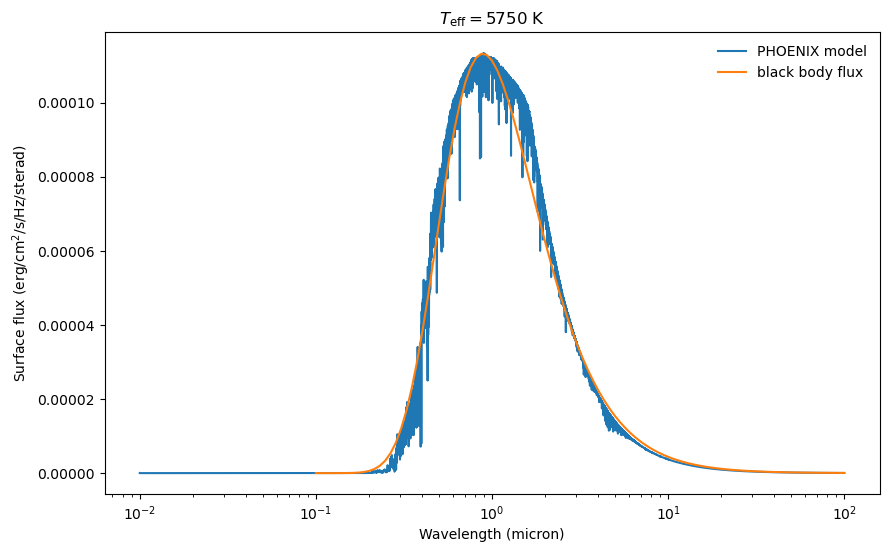

<Figure size 1000x600 with 0 Axes>

In [4]:
import pylab as plt
plt.plot(wlen_in_cm/1e-4, flux_star, label = 'PHOENIX model')
plt.plot(lamb/1e-4, np.pi*planck, label = 'black body flux')
plt.title(r'$T_{\rm eff}=5750$ K')
plt.xscale('log')
plt.xlabel('Wavelength (micron)')
plt.ylabel('Surface flux (erg/cm$^2$/s/Hz/sterad)')
plt.legend(loc = 'best', frameon = False)
plt.show()
plt.clf()

## Guillot temperature model

In petitRADTRANS, one can use analytical atmospheric P-T profile from [Guillot (2010)](http://adsabs.harvard.edu/abs/2010A%26A...520A..27G), his Equation 29:
\begin{equation}
T^4 = \frac{3T_{\rm int}^4}{4}\left(\frac{2}{3}+\tau\right) + \frac{3T_{\rm equ}^4}{4}\left[\frac{2}{3}+\frac{1}{\gamma\sqrt{3}}+\left(\frac{\gamma}{\sqrt{3}}-\frac{1}{\gamma\sqrt{3}}\right)e^{-\gamma\tau\sqrt{3}}\right]
\end{equation}
with $\tau = P\kappa_{\rm IR}/g$. Here, $\tau$ is the optical depth, $P$ the pressure, $\kappa_{\rm IR}$ the atmospheric opacity in the IR wavelengths (i.e. the cross-section per unit mass), $g$ the atmospheric surface gravity, $\gamma$ is the ratio between the optical and IR opacity, $T_{\rm equ}$ the atmospheric equilibrium temperature, and $T_{\rm int}$ is the planetary internal temperature.

Let's define an example, all units are cgs units, except for the pressure, which is in bars:

In [5]:
from petitRADTRANS.physics import temperature_profile_function_guillot_global

pressures_bar = np.logspace(-6, 2, 100)

reference_gravity = 10**3.5
kappa_IR = 0.01
gamma = 0.4
T_int = 200.
T_equ = 1500.

temperatures = temperature_profile_function_guillot_global(pressures_bar, kappa_IR, gamma, reference_gravity, T_int, T_equ)

Let's plot the P-T profile:

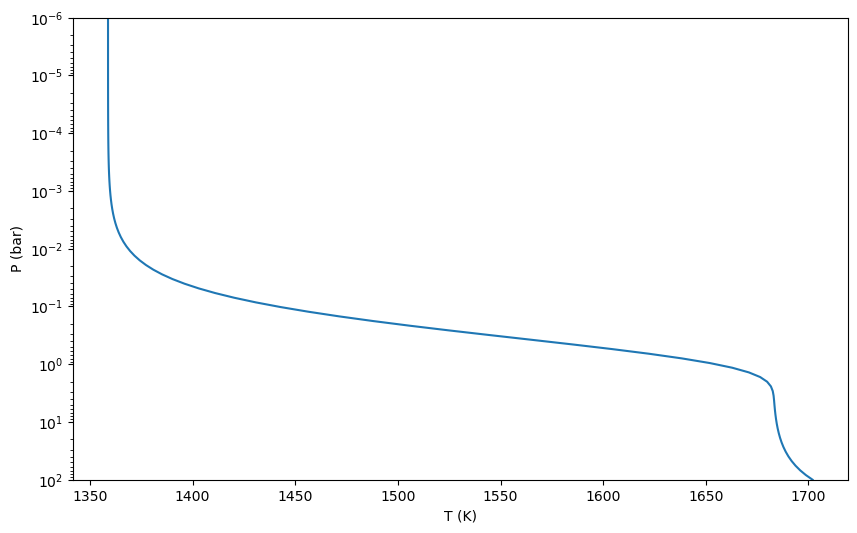

<Figure size 1000x600 with 0 Axes>

In [6]:
plt.plot(temperatures, pressures_bar)
plt.yscale('log')
plt.ylim([1e2, 1e-6])
plt.xlabel('T (K)')
plt.ylabel('P (bar)')
plt.show()
plt.clf()